In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
airport = pd.read_csv('airport_survey.csv')

In [6]:
airport

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [7]:
airport.info

<bound method DataFrame.info of             ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   

# Question 1: 
Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

In [8]:
P_satisfied = airport['Satisfaction']

In [9]:
sum1= P_satisfied.value_counts()
print(sum1)
total = sum1.sum()
print(total)

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64
129880


In [10]:
sum2= P_satisfied[P_satisfied == 'Satisfied'].value_counts()
print(sum2)

Satisfied    56428
Name: Satisfaction, dtype: int64


In [11]:
sum3= P_satisfied[P_satisfied == 'Neutral or Dissatisfied'].value_counts()
print(sum3)

Neutral or Dissatisfied    73452
Name: Satisfaction, dtype: int64


In [12]:
percentage = (sum2 / total) * 100
print(f"The percentage of Satisfied Passenger: {percentage}")

The percentage of Satisfied Passenger: Satisfied    43.446258
Name: Satisfaction, dtype: float64


In [13]:
percentage = (sum3 / total) * 100
print(f"The percentage of Satisfied Passenger: {percentage}")

The percentage of Satisfied Passenger: Neutral or Dissatisfied    56.553742
Name: Satisfaction, dtype: float64


In [14]:
satisfaction_by_customer_type = airport.groupby('Customer Type')['Satisfaction'].apply(lambda x: (x == 'Satisfied').mean() * 100)
print("Satisfaction percentage by customer type:")
print(satisfaction_by_customer_type)

Satisfaction percentage by customer type:
Customer Type
First-time    23.969722
Returning     47.811499
Name: Satisfaction, dtype: float64


In [15]:
satisfaction_by_travel_type = airport.groupby('Type of Travel')['Satisfaction'].apply(lambda x: (x == 'Satisfied').mean() * 100)
print("Satisfaction percentage by travel type:")
print(satisfaction_by_travel_type)

Satisfaction percentage by travel type:
Type of Travel
Business    58.372448
Personal    10.132630
Name: Satisfaction, dtype: float64


# Question 2:
   What is the customer profile for a repeating airline passenger?

In [16]:
Gender = airport.groupby('Gender').apply(lambda x: (x['Customer Type'] == 'Returning').mean() * 100)

In [17]:
Gender

Gender
Female    80.511085
Male      82.905863
dtype: float64

In [18]:
airport['Age'].max()

85

In [19]:
a = 1
b = 10
list1 = []
age_labels = []

while True:
    age_subset = airport[(airport['Age'] >= a) & (airport['Age'] <= b)]
    if len(age_subset) > 0:
        m = age_subset['Customer Type'].eq('Returning').mean()
        round1 = round((m * 100),2)
        list1.append(round1)
        age_labels.append(f"{a} - {b} age")
    else:
        break
                                              
                                              
    a += 10
                                              
    b += 10
                                              
list1

[89.44, 75.73, 56.06, 79.69, 91.66, 96.89, 95.86, 87.54, 60.0]

In [20]:
agegroup_of_returning = [{val1:val2} for val1, val2 in zip(age_labels, list1)]
print (agegroup_of_returning)

[{'1 - 10 age': 89.44}, {'11 - 20 age': 75.73}, {'21 - 30 age': 56.06}, {'31 - 40 age': 79.69}, {'41 - 50 age': 91.66}, {'51 - 60 age': 96.89}, {'61 - 70 age': 95.86}, {'71 - 80 age': 87.54}, {'81 - 90 age': 60.0}]


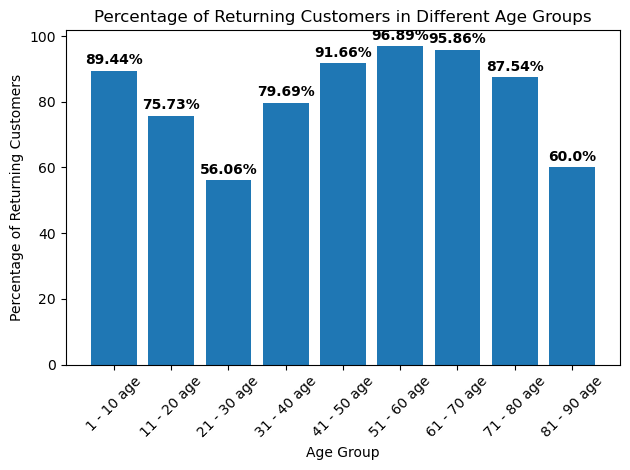

In [21]:
x = [list(d.keys())[0] for d in agegroup_of_returning]
y = [list(d.values())[0] for d in agegroup_of_returning]
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('Percentage of Returning Customers in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Returning Customers')

for i, v in enumerate(y):
    plt.text(i, v + 1, f"{str(v)}%", ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()

# Question 3
Does flight distance affect customer preferences or flight patterns?

In [23]:
a = airport.groupby('Flight Distance')

In [27]:
flight_counts = a['Flight Distance'].count()
print(flight_counts.head)
print(flight_counts.value_counts())

<bound method NDFrame.head of Flight Distance
31       11
56       11
67      160
73       77
74       42
       ... 
4243     23
4502     14
4817      6
4963     19
4983     16
Name: Flight Distance, Length: 3821, dtype: int64>
10     286
11     268
8      264
9      263
12     234
      ... 
202      1
438      1
304      1
287      1
153      1
Name: Flight Distance, Length: 274, dtype: int64


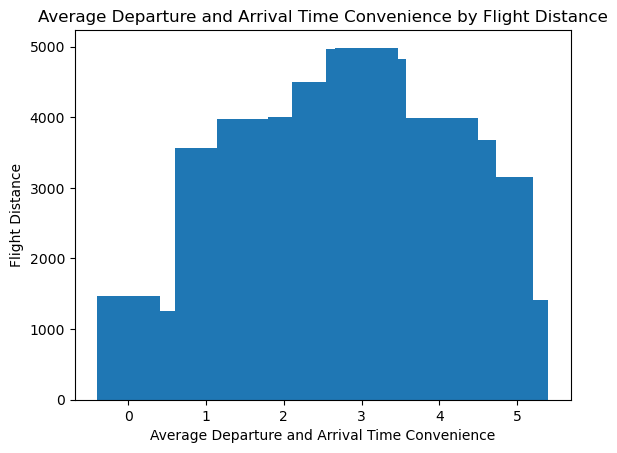

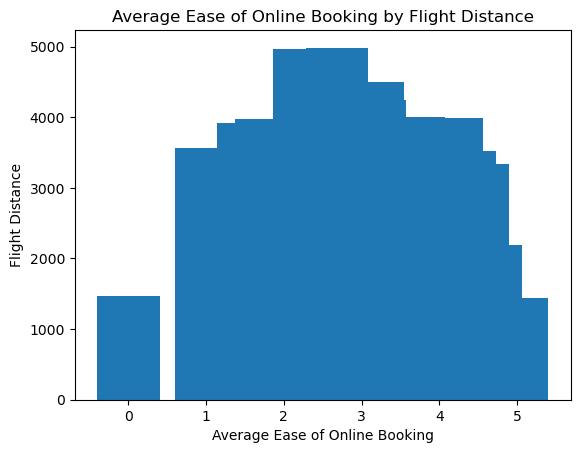

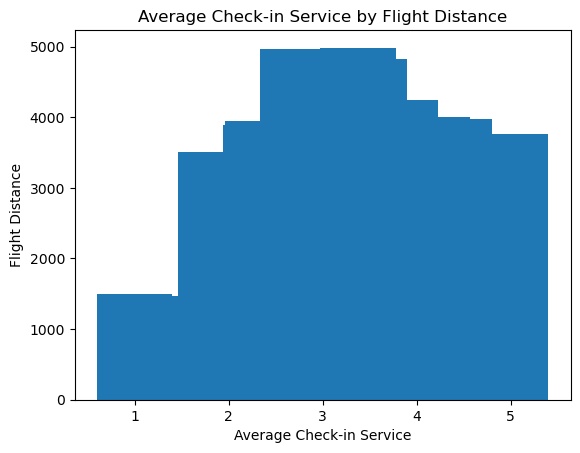

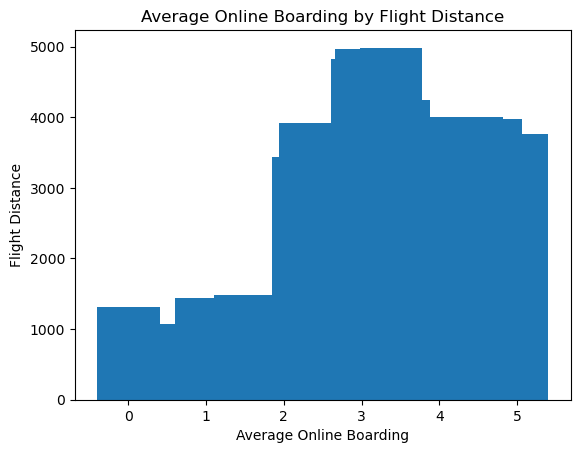

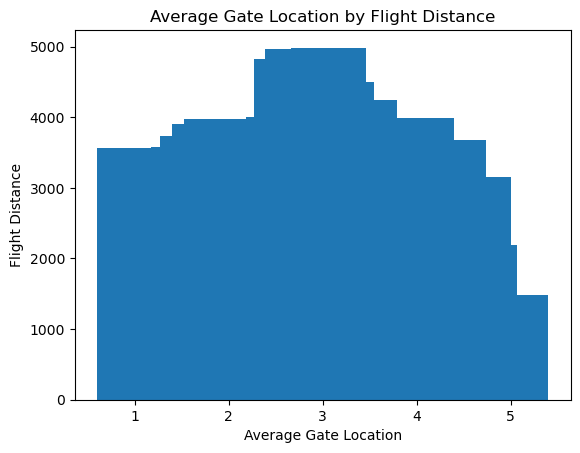

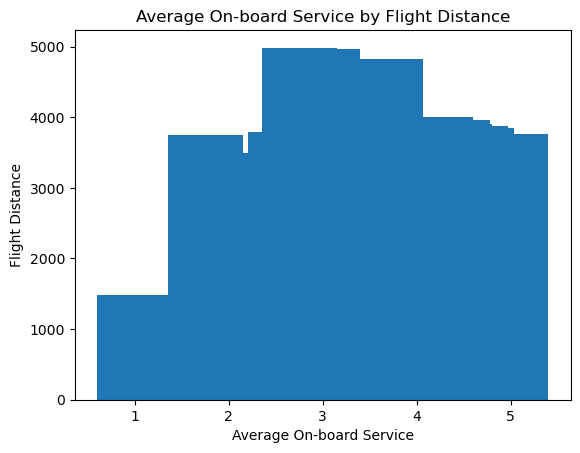

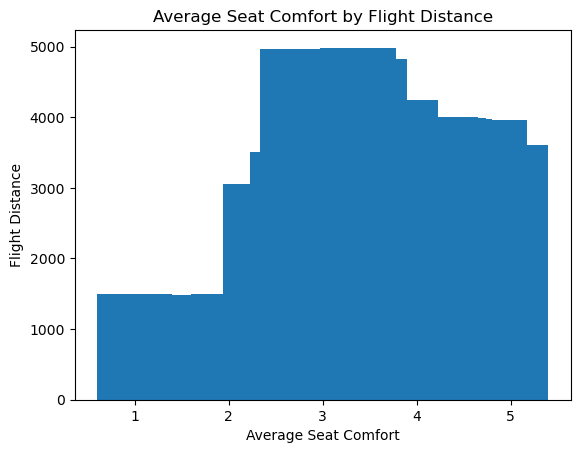

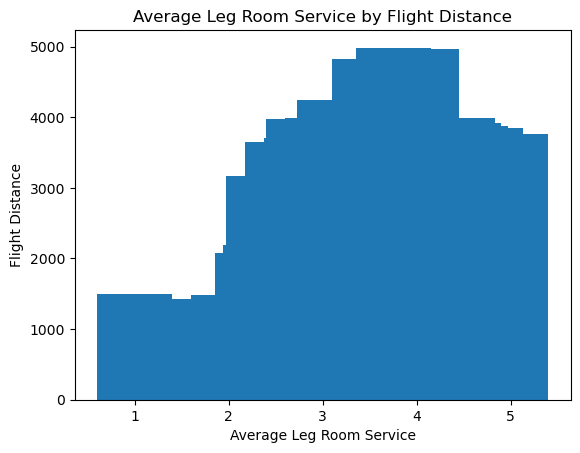

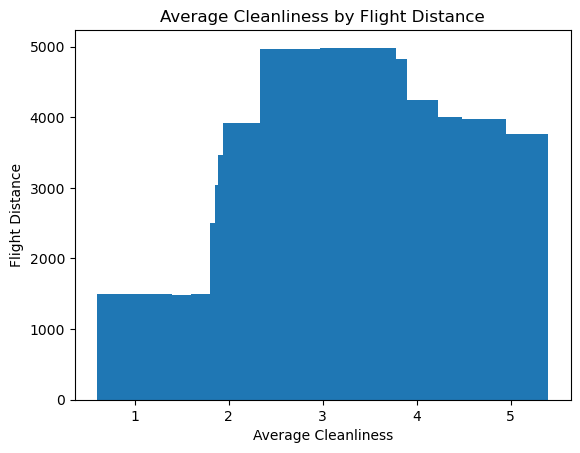

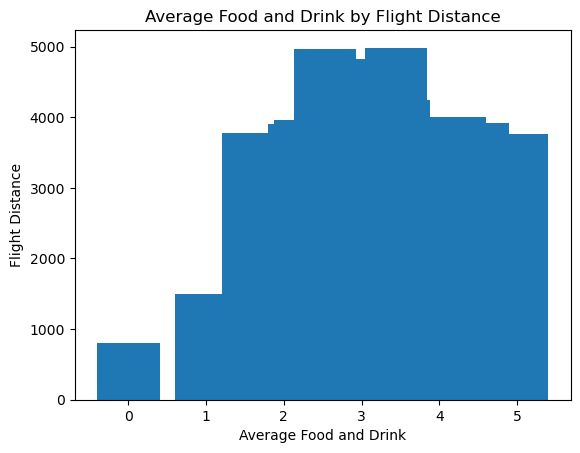

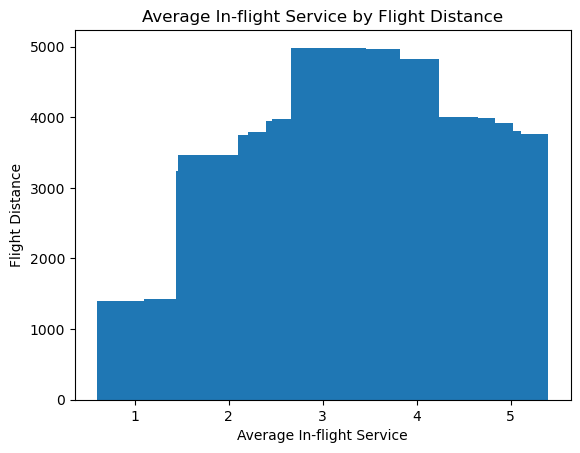

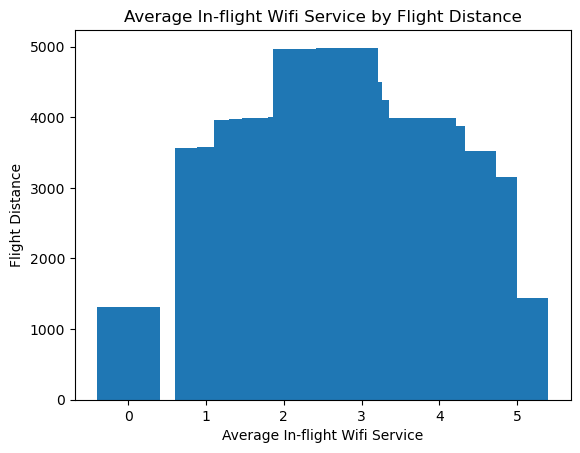

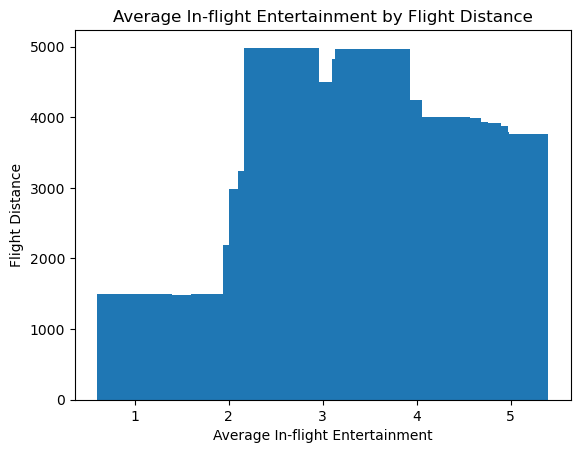

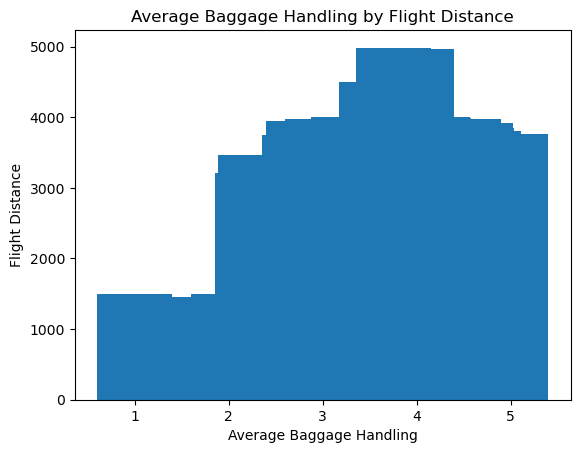

In [76]:
a = ['Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service','Seat Comfort', 'Leg Room Service','Cleanliness','Food and Drink','In-flight Service','In-flight Wifi Service', 'In-flight Entertainment','Baggage Handling']
for feature in a:
    mean_delay_by_distance = airport.groupby('Flight Distance')[feature].mean().reset_index()

    mean_delay_by_distance = mean_delay_by_distance.reset_index()
    plt.bar(mean_delay_by_distance[feature], mean_delay_by_distance['Flight Distance'])
    plt.xlabel(f'Average {feature}')
    plt.ylabel('Flight Distance')
    plt.title(f'Average {feature} by Flight Distance')

    plt.show()

In [80]:
orr = airport.corr()

In [81]:
orr

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,1.000000,0.020322,0.095504,-0.017643,-0.035657,-0.002192,0.013400,0.079325,0.055538,-0.000113,0.055502,0.052164,0.044088,0.024048,-0.000510,0.078793,-0.023096,0.001620,0.074569
Age,0.020322,1.000000,0.099459,-0.009041,-0.011248,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.095504,0.099459,1.000000,0.002402,-0.001935,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,-0.017643,-0.009041,0.002402,1.000000,0.965291,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,-0.035657,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,-0.002192,0.036960,-0.018914,0.000778,-0.000942,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.013400,0.022565,0.065165,-0.005318,-0.007033,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.079325,0.033475,0.073608,-0.018752,-0.021705,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.055538,0.207572,0.214825,-0.019404,-0.022730,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,-0.000113,-0.000398,0.005520,0.005973,0.005658,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972


In [82]:
orr['Flight Distance']

ID                                        0.095504
Age                                       0.099459
Flight Distance                           1.000000
Departure Delay                           0.002402
Arrival Delay                            -0.001935
Departure and Arrival Time Convenience   -0.018914
Ease of Online Booking                    0.065165
Check-in Service                          0.073608
Online Boarding                           0.214825
Gate Location                             0.005520
On-board Service                          0.111194
Seat Comfort                              0.157662
Leg Room Service                          0.134533
Cleanliness                               0.095648
Food and Drink                            0.057066
In-flight Service                         0.059316
In-flight Wifi Service                    0.006701
In-flight Entertainment                   0.130507
Baggage Handling                          0.064855
Name: Flight Distance, dtype: f

'Flight Distance' has a negative correlation of -0.018914 with 'Departure and Arrival Time Convenience,' which means that as the flight distance increases, the satisfaction with departure and arrival time convenience tends to decrease slightly.

# Question 4:
Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [108]:
satisfaction_mapping = {'Satisfied': 1, 'Neutral or Dissatisfied': 0}
airport['Satisfaction_Num'] = airport['Satisfaction'].map(satisfaction_mapping)

In [109]:
airport['Satisfaction_Num']

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction_Num, Length: 129880, dtype: int64

In [176]:
a = ['Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service','Seat Comfort', 'Leg Room Service','Cleanliness','Food and Drink','In-flight Service','In-flight Wifi Service', 'In-flight Entertainment','Baggage Handling']
satisfied_rating = []
Dissatisfied  = []
review_label = []
for review in a:

    mean_convenience_satisfied = round(airport.loc[airport['Satisfaction_Num'] == 1, [review]].mean(), 2)
    mean_convenience_not_satisfied = round(airport.loc[airport['Satisfaction_Num'] == 0, [review]].mean(), 2)
    satisfied_rating.append(mean_convenience_satisfied)
    Dissatisfied.append(mean_convenience_not_satisfied)
    review_label.append(review)

    print(f'Average {review} Satisfied:', mean_convenience_satisfied)
    print(f'Average {review} for Neutral or Dissatisfied:', mean_convenience_not_satisfied)

Average Departure and Arrival Time Convenience Satisfied: Departure and Arrival Time Convenience    2.96
dtype: float64
Average Departure and Arrival Time Convenience for Neutral or Dissatisfied: Departure and Arrival Time Convenience    3.13
dtype: float64
Average Ease of Online Booking Satisfied: Ease of Online Booking    3.03
dtype: float64
Average Ease of Online Booking for Neutral or Dissatisfied: Ease of Online Booking    2.55
dtype: float64
Average Check-in Service Satisfied: Check-in Service    3.65
dtype: float64
Average Check-in Service for Neutral or Dissatisfied: Check-in Service    3.04
dtype: float64
Average Online Boarding Satisfied: Online Boarding    4.03
dtype: float64
Average Online Boarding for Neutral or Dissatisfied: Online Boarding    2.66
dtype: float64
Average Gate Location Satisfied: Gate Location    2.97
dtype: float64
Average Gate Location for Neutral or Dissatisfied: Gate Location    2.98
dtype: float64
Average On-board Service Satisfied: On-board Service  

In [178]:
factors_contribute_Satisfied = [{val1:val2} for val1, val2 in zip(review_label, satisfied_rating)]
factors_contribute_dissatisfied = [{val1:val2} for val1, val2 in zip(review_label, Dissatisfied)]


In [179]:
factors_contribute_Satisfied


[{'Departure and Arrival Time Convenience': Departure and Arrival Time Convenience    2.96
  dtype: float64},
 {'Ease of Online Booking': Ease of Online Booking    3.03
  dtype: float64},
 {'Check-in Service': Check-in Service    3.65
  dtype: float64},
 {'Online Boarding': Online Boarding    4.03
  dtype: float64},
 {'Gate Location': Gate Location    2.97
  dtype: float64},
 {'On-board Service': On-board Service    3.86
  dtype: float64},
 {'Seat Comfort': Seat Comfort    3.97
  dtype: float64},
 {'Leg Room Service': Leg Room Service    3.82
  dtype: float64},
 {'Cleanliness': Cleanliness    3.75
  dtype: float64},
 {'Food and Drink': Food and Drink    3.53
  dtype: float64},
 {'In-flight Service': In-flight Service    3.97
  dtype: float64},
 {'In-flight Wifi Service': In-flight Wifi Service    3.16
  dtype: float64},
 {'In-flight Entertainment': In-flight Entertainment    3.96
  dtype: float64},
 {'Baggage Handling': Baggage Handling    3.97
  dtype: float64}]

In [182]:
factors_contribute_dissatisfied

[{'Departure and Arrival Time Convenience': Departure and Arrival Time Convenience    3.13
  dtype: float64},
 {'Ease of Online Booking': Ease of Online Booking    2.55
  dtype: float64},
 {'Check-in Service': Check-in Service    3.04
  dtype: float64},
 {'Online Boarding': Online Boarding    2.66
  dtype: float64},
 {'Gate Location': Gate Location    2.98
  dtype: float64},
 {'On-board Service': On-board Service    3.02
  dtype: float64},
 {'Seat Comfort': Seat Comfort    3.04
  dtype: float64},
 {'Leg Room Service': Leg Room Service    2.99
  dtype: float64},
 {'Cleanliness': Cleanliness    2.93
  dtype: float64},
 {'Food and Drink': Food and Drink    2.96
  dtype: float64},
 {'In-flight Service': In-flight Service    3.39
  dtype: float64},
 {'In-flight Wifi Service': In-flight Wifi Service    2.4
  dtype: float64},
 {'In-flight Entertainment': In-flight Entertainment    2.89
  dtype: float64},
 {'Baggage Handling': Baggage Handling    3.37
  dtype: float64}]

In [199]:
max_val_key = list(factors_contribute_Satisfied[0].keys())[0]
max_val = factors_contribute_Satisfied[0][max_val_key].item()

for dictionary in factors_contribute_Satisfied:
    key = list(dictionary.keys())[0]
    val = dictionary[key].item()

    # Check if current val is higher than the last defined max_val
    if val > max_val:
        max_val = val
        max_val_key = key

print("Maximum Value:", max_val)
print("Key with Maximum Value:", max_val_key)

Maximum Value: 4.03
Key with Maximum Value: Online Boarding


In [201]:
max_val_key = list(factors_contribute_dissatisfied[0].keys())[0]
max_val = factors_contribute_dissatisfied[0][max_val_key].item()

for dictionary in factors_contribute_dissatisfied:
    key = list(dictionary.keys())[0]
    val = dictionary[key].item()

    # Check if current val is higher than the last defined max_val
    if val > max_val:
        max_val = val
        max_val_key = key

print("Maximum Value:", max_val)
print("Key with Maximum Value:", max_val_key)

Maximum Value: 3.39
Key with Maximum Value: In-flight Service
